In [1]:
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sn
import matplotlib.ticker as ticker
import numpy as np

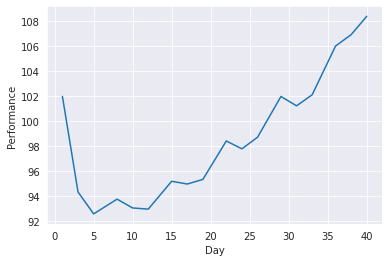

In [2]:
# Print performance gain
logs = pd.read_csv("data/pre_program_logs.csv", sep='|', index_col=False)

ind_logs = {}
for p_id, group in logs.groupby('ID'):
    ind_logs[p_id] = group

#289, #205
logs = ind_logs[289]

logs = logs.drop_duplicates(subset="Performance")
logs = logs.sort_values(by='Timestamp')
logs["Timestamp"] = pd.to_datetime(logs["Timestamp"])

sd = logs.iloc[0, 4]

headers = ["Day", "Performance"]
data = pd.DataFrame(columns=headers)
days = logs["Timestamp"].map(lambda x: (x - sd).days + 1)
for i, day in enumerate(days):
    data = data.append({"Day": day, "Performance": logs.iloc[i]["Performance"]}, ignore_index=True)
    #print(day)


sn.set_style("darkgrid")
g = sn.lineplot(x="Day", y="Performance", data=data)
g.plot()
g.figure.savefig("pre_peperformance_increase__ind289.png")


In [1]:
# Print table of TTR

import sys
sys.path.append('../../recengine')
sys.path.append('../../recengine/data_parser.py')
from data_parser import ttrdata_from_csv_population_4_weeks

# Loads raw data and transforms.
logs = pd.read_csv("./data/program_logs.csv", sep="|")

# Calculate TTR_DATA based on pre-logs.
ttr_data = ttrdata_from_csv_population_4_weeks("./data/pre_program_logs.csv")

post_logs = {}
for p_id, group in logs.groupby('ID'):
    post_logs[str(p_id)] = group


headers = ["load_week1", "max_week1", "load_week2", "max_week2", "load_week3", "max_week3", "load_week4", "max_week4", "Performance"]

data = pd.DataFrame(columns=headers)

for index, row in ttr_data.iterrows():
    p_id = row["id"]
    ttr = row.drop("id").values.tolist()
    
    postperformance = post_logs.get(p_id)["Performance"].values[-1]
    ttr.append(postperformance)
    
    data = data.append(pd.Series(ttr, index=data.columns), ignore_index=True)

data = data.round(1)
print(data.to_latex(index=False))


ModuleNotFoundError: No module named 'data_parser'